In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 11)}, font_scale=2)

from tqdm import tqdm

import sys
sys.path.append('../../')

import utils
import semantic_type_propagation as stp

# Improve Existing Homograph Groundtruth

In [22]:
df_path = '../../output/TUS/'
g_path = '../../../graph_construction/combined_graphs_output/TUS/bipartite/bipartite.graph'

df = pd.read_pickle(df_path + 'graph_stats_with_groundtruth_df.pickle')
G = pickle.load(open(g_path, "rb"))

In [23]:
# Create the 'graph_stats_with_groundtruth_updated_homographs_df.pickle'
# Uncomment this cell if the dataframe has not been produced

# # Improve the derived homograph groundtruth by identifying values with more than one meaning by considering the column names where they are found
# vals_with_more_than_1_meaning = set()
# all_col_names = set()
# for idx, row in tqdm(df.iterrows(), total=df.shape[0]):
#     col_names =  utils.graph_helpers.get_cell_node_column_names(G, row['node'])
#     num_meanings = len(col_names)
#     all_col_names |= set(col_names)
#     if num_meanings > 1:
#         vals_with_more_than_1_meaning.add(row['node'])
# print('Nodes with more than 1 meaning:', len(vals_with_more_than_1_meaning))
# print('Number of unique column names', len(all_col_names))

# # Update the 'is_homograph' column, to be true for only nodes found in 'vals_with_more_than_1_meaning'
# df['is_homograph'] = False
# df.loc[df['node'].isin(vals_with_more_than_1_meaning), 'is_homograph'] = True

# # Save updated dataframe
# df.to_pickle(df_path+'graph_stats_with_groundtruth_updated_homographs_df.pickle')

In [24]:
df = pd.read_pickle(df_path+'graph_stats_with_groundtruth_updated_homographs_df.pickle')

# Remove nodes with degree 1 from the dataframe
df = stp.process_df(df, G)

# Compute the groundtruth for the number of meanings for each homograph
df = utils.num_meanings.get_num_meanings_groundtruth(df, G)
df.sort_values(by='betweenness_centrality', ascending=False).head(30)

  1%|▏         | 157/11150 [00:00<00:07, 1563.52it/s]

There are 185941 cell nodes with a degree greater than 1
There are 2994 unique ranks based on BC.


100%|██████████| 11150/11150 [00:05<00:00, 2182.09it/s]


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2
70313,.,cell,0.023005,0.000278,True,False,3.0,3
10223,50,cell,0.022695,0.000293,True,False,4.0,8
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2
167467,Conseil de d�veloppement du loisir scientifique,cell,0.019039,0.000248,True,False,6.0,2
37189,125,cell,0.018832,0.000235,True,False,7.0,4
17681,2,cell,0.018183,0.000220,True,False,8.0,8
154414,Biomedical Engineering,cell,0.017811,0.000219,True,False,9.0,2
178282,SQA,cell,0.012905,0.000159,True,False,10.0,2


In [25]:
df['num_meanings_groundtruth'].value_counts()

1     174791
2       9791
3       1059
4        231
5         43
6         12
7          8
8          5
20         1
Name: num_meanings_groundtruth, dtype: int64

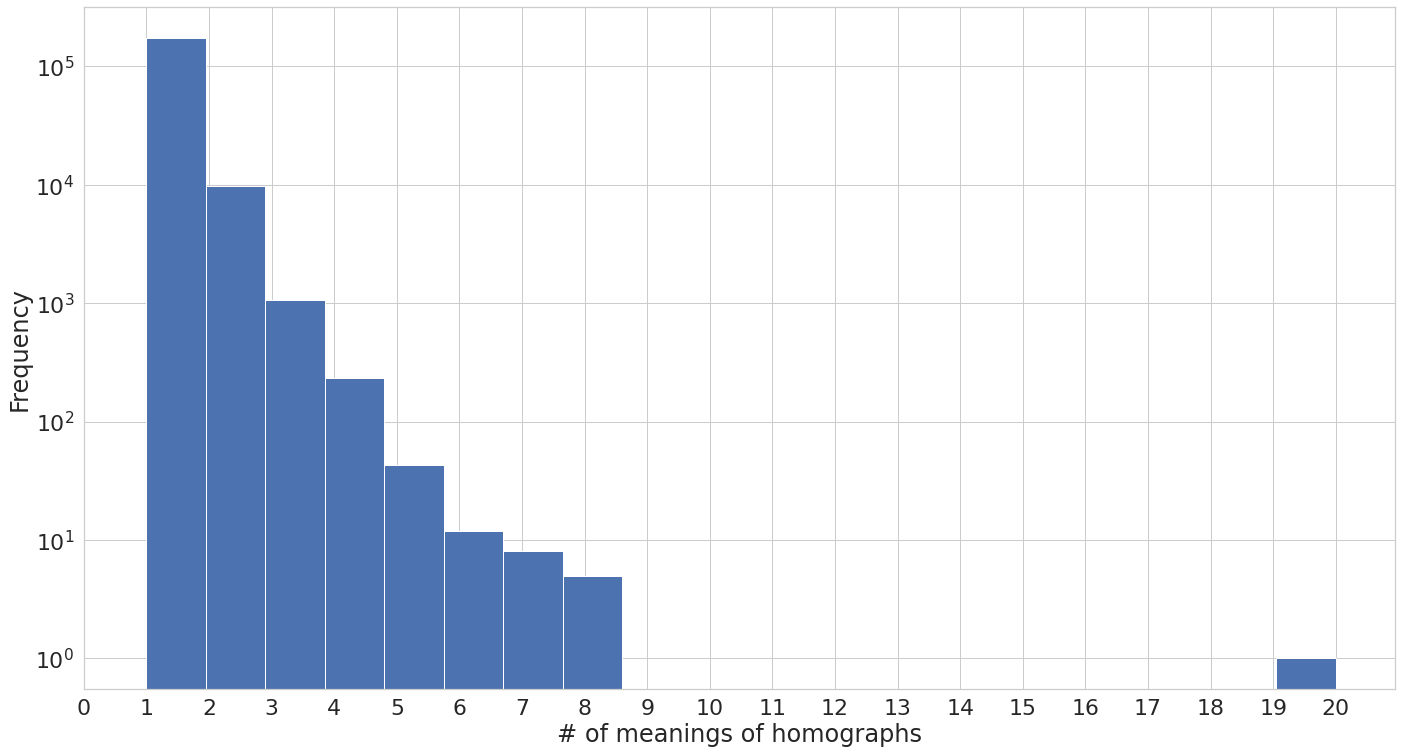

In [26]:
plt.hist(df['num_meanings_groundtruth'], log=True, bins=20)
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('# of meanings of homographs');plt.ylabel('Frequency');plt.tight_layout()
plt.savefig('../../figures/num_meanings/TUS/num_meanings_histogram.svg')

# Evaluation (Top-300)

In [7]:
# Get a list with the top 300 nodes
json.dumps(df['node'][:300].tolist(), ensure_ascii=False)

'["Music Faculty", "Manitoba Hydro", ".", "50", "1800ZZMALDY2", "Conseil de d�veloppement du loisir scientifique", "125", "2", "Biomedical Engineering", "SQA", "Fraser Valley", " ", "647", "PUB", "Astronomy and Astrophysics", "Unknown", "Cardiff University", "Communitech", "Ocean Networks Canada", "Human Frontier Science Program", "3", "None", "Combinatorics and Optimization", "Togo", "Mechanical and Mechatronics Engineering", "ABI", "Common", "761", "BRIDGE STREET", "Newport", "Cardiff", "Bridge", "109", "GreenCentre Canada", "ASM Materials Camp Canada", "A", "Park & Ride", "OAKLANDS ROAD", "Park Road", "Broad Street", "Newtown", "MINERA", "672", "100", "PARK AND RIDE", "Buckley", "CIS", "Information not available", "Corporation Road", "Carmarthen", "Nelson", "SCH", "Station Road", "RFD", "Psychologie", "Georgia", "University of Western Ontario", "University of Victoria", "Broadway", "Alexandra Road", "nr", "Swimming Pool", "HEC Montr�al", "Waterloo", "Montserrat", "Farm", "MTQ", "100

In [12]:
output_dir_incomplete = '../../output/TUS/num_of_meanings_incomplete_coverage/'
output_dir_complete = '../../output/TUS/num_of_meanings_complete_coverage/'

with open(output_dir_incomplete + 'output.json') as json_file:
    out_dict_incomplete = json.load(json_file)

with open(output_dir_complete + 'output.json') as json_file:
    out_dict_complete = json.load(json_file)

## Incomplete Coverage

In [15]:
df_incomplete = utils.num_meanings.process_num_meanings_df(df.copy(), out_dict_incomplete, G)
df_incomplete.to_pickle(output_dir_incomplete+'df_processed.pickle')

df_incomplete[df_incomplete['node'].isin(out_dict_incomplete['marked_homographs'].keys())]

100%|██████████| 300/300 [03:03<00:00,  1.64it/s]


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3,2.0,3246.0,0.614295,2.0,57.0,25.390635,False,False
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2,2.0,3236.0,1.000000,2.0,121.0,22.199320,True,True
70313,.,cell,0.023005,0.000278,True,False,3.0,3,3.0,919.0,1.000000,3.0,62.0,21.978237,True,True
10223,50,cell,0.022695,0.000293,True,False,4.0,8,4.0,4887.0,0.986904,3.0,73.0,4.994066,False,False
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2,2.0,5907.0,0.829524,2.0,32.0,18.920433,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135426,Networks of Centres of Excellence - Letters of...,cell,0.000259,0.000004,True,False,232.0,2,5.0,11.0,1.000000,5.0,196.0,24.636364,False,False
82411,METROLINK STOP,cell,0.000256,0.000003,True,False,233.0,2,3.0,5918.0,0.735215,3.0,104.0,22.496789,False,False
35501,Harold Ave,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False
34884,Enfield Rd,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False


## Complete Coverage

In [17]:
df_complete = utils.num_meanings.process_num_meanings_df(df.copy(), out_dict_complete, G)
df_complete.to_pickle(output_dir_complete+'df_processed.pickle')

df_complete[df_incomplete['node'].isin(out_dict_complete['marked_homographs'].keys())]

100%|██████████| 300/300 [03:04<00:00,  1.63it/s]


,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
65462,Music Faculty,cell,0.051298,0.000639,True,False,1.0,3,2.0,3246.0,0.614295,2.0,57.0,25.390635,False,False
28669,Manitoba Hydro,cell,0.033938,0.000448,True,False,2.0,2,2.0,3236.0,1.000000,2.0,121.0,22.199320,True,True
70313,.,cell,0.023005,0.000278,True,False,3.0,3,3.0,919.0,1.000000,3.0,62.0,21.978237,True,True
10223,50,cell,0.022695,0.000293,True,False,4.0,8,4.0,4888.0,0.986702,3.0,73.0,4.994272,False,False
47053,1800ZZMALDY2,cell,0.022212,0.000281,True,False,5.0,2,2.0,5907.0,0.829524,2.0,32.0,18.920433,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135426,Networks of Centres of Excellence - Letters of...,cell,0.000259,0.000004,True,False,232.0,2,5.0,14.0,1.000000,5.0,196.0,29.785714,False,False
82411,METROLINK STOP,cell,0.000256,0.000003,True,False,233.0,2,3.0,5918.0,0.735215,3.0,104.0,22.496789,False,False
35501,Harold Ave,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False
34884,Enfield Rd,cell,0.000255,0.000003,True,False,234.0,3,2.0,3928.0,0.703666,2.0,35.0,14.564919,False,False


In [13]:
df_incomplete = pd.read_pickle(output_dir_incomplete+'df_processed.pickle')
df_complete = pd.read_pickle(output_dir_complete+'df_processed.pickle')

In [14]:
# Precision using propagation and connected components:
df_incomplete_300 = df_incomplete[df_incomplete['node'].isin(out_dict_complete['marked_homographs'].keys())]
df_complete_300 = df_complete[df_complete['node'].isin(out_dict_complete['marked_homographs'].keys())]

print('Incomplete coverage with propagation precision:', df_incomplete_300['is_num_meanings_correct'].value_counts()[True] / len(df_incomplete_300.index))
print('Complete coverage with propagation precision:', df_complete_300['is_num_meanings_correct'].value_counts()[True] / len(df_complete_300.index))

print('Incomplete coverage with connected components precision:', df_incomplete_300['is_num_components_correct'].value_counts()[True] / len(df_incomplete_300.index))
print('Complete coverage with connected components precision:', df_complete_300['is_num_components_correct'].value_counts()[True] / len(df_complete_300.index))


Incomplete coverage with propagation precision: 0.29
Complete coverage with propagation precision: 0.25666666666666665
Incomplete coverage with connected components precision: 0.18666666666666668
Complete coverage with connected components precision: 0.18


In [15]:
# Identify how many truly unambiguous values were identified to have only 1 meaning
df_incomplete_300_uv = df_incomplete_300[df_incomplete_300['is_homograph'] == False]
df_complete_300_uv = df_complete_300[df_complete_300['is_homograph'] == False]

print('UV Incomplete coverage with propagation correct:', df_incomplete_300_uv['is_num_meanings_correct'].value_counts()[True])
print('UV Complete coverage with propagation correct:', df_complete_300_uv['is_num_meanings_correct'].value_counts())

print('UV Incomplete coverage with connected components correct:', df_incomplete_300_uv['is_num_components_correct'].value_counts()[True])
print('UV Complete coverage with connected components correct:', df_complete_300_uv['is_num_components_correct'].value_counts())

UV Incomplete coverage with propagation correct: 2
UV Complete coverage with propagation correct: False    46
Name: is_num_meanings_correct, dtype: int64
UV Incomplete coverage with connected components correct: 2
UV Complete coverage with connected components correct: False    46
Name: is_num_components_correct, dtype: int64


In [46]:
# Precision of the marked unambiguous values
print('Incomplete coverage UV precision:', df_incomplete_300['marked_unambiguous_values_precision'].mean())
print('Complete coverage UV precision:', df_complete_300['marked_unambiguous_values_precision'].mean())

Incomplete coverage UV precision: 0.9100543395898422
Complete coverage UV precision: 0.9098956455345634


In [32]:
df_300 = df.sort_values(by='betweenness_centrality', ascending=False).head(300)
df_300['is_homograph'].value_counts()

True     254
False     46
Name: is_homograph, dtype: int64

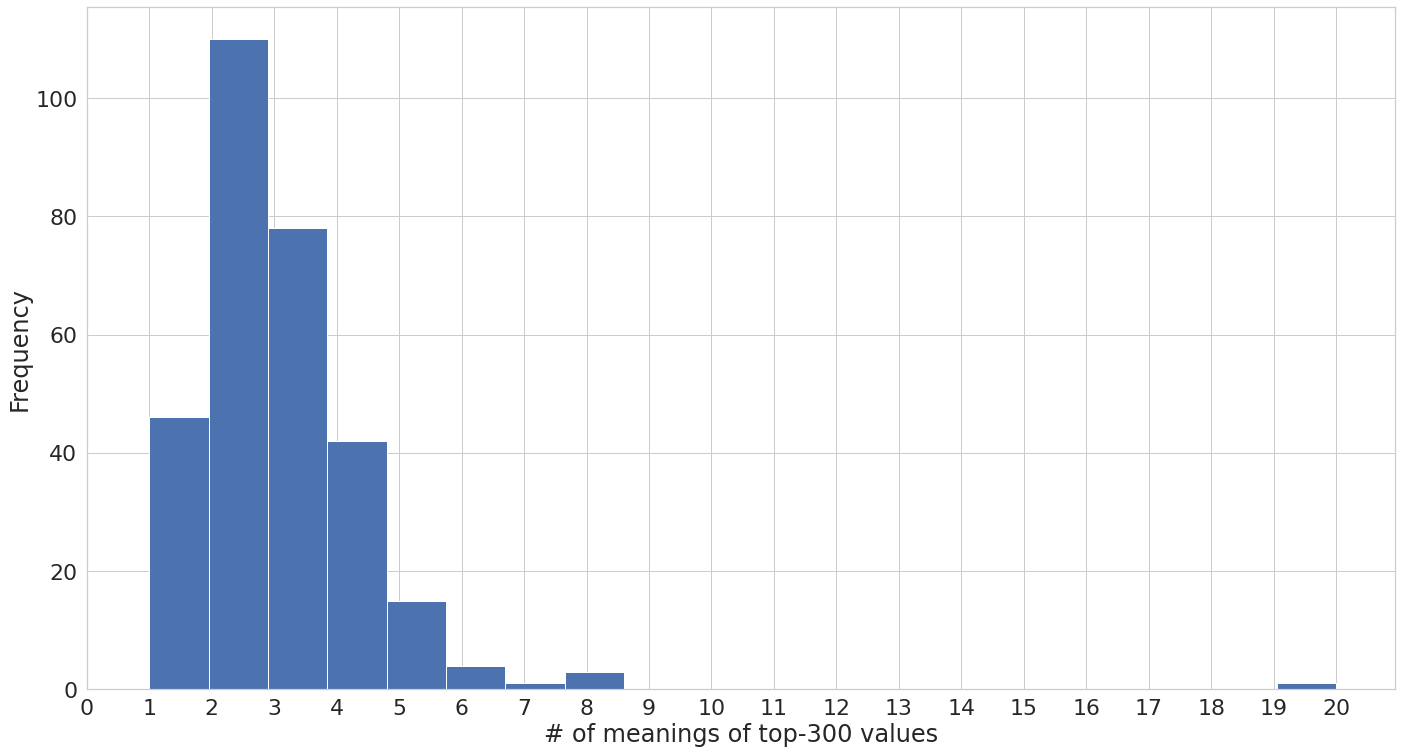

In [37]:
plt.hist(df_300['num_meanings_groundtruth'], bins=20)
plt.xlabel('# of meanings of top-300 values');plt.ylabel('Frequency');plt.tight_layout()
plt.xticks(np.arange(0, 21, 1.0))
plt.savefig('../../figures/num_meanings/TUS/num_meanings_top_300_histogram.svg')

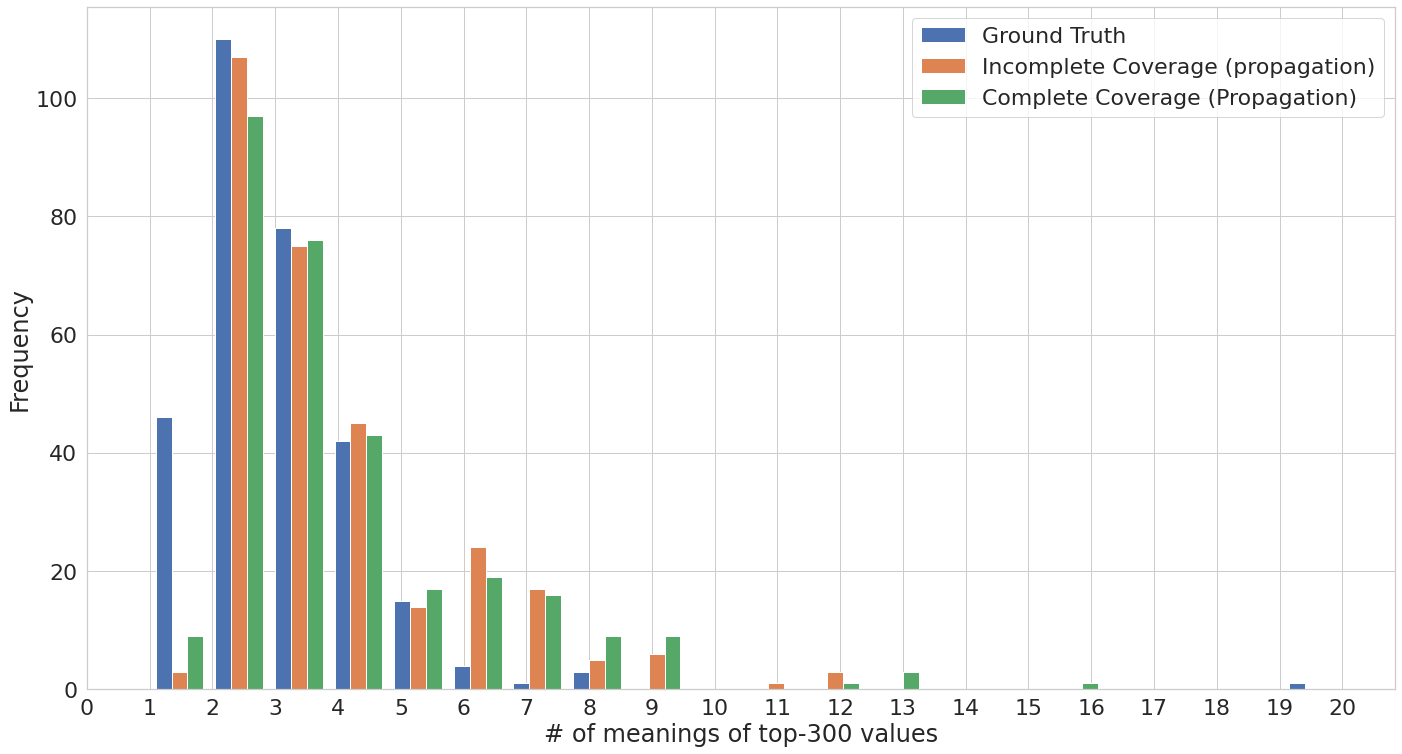

In [42]:
ax = plt.hist([df_300['num_meanings_groundtruth'], df_incomplete_300['num_meanings'], df_complete_300['num_meanings']], bins=20, label=['Ground Truth', 'Incomplete Coverage (propagation)', 'Complete Coverage (Propagation)'])
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('# of meanings of top-300 values');plt.ylabel('Frequency');plt.legend();plt.tight_layout()
plt.savefig('../../figures/num_meanings/TUS/num_meanings_top_300_propagation_histogram.svg')

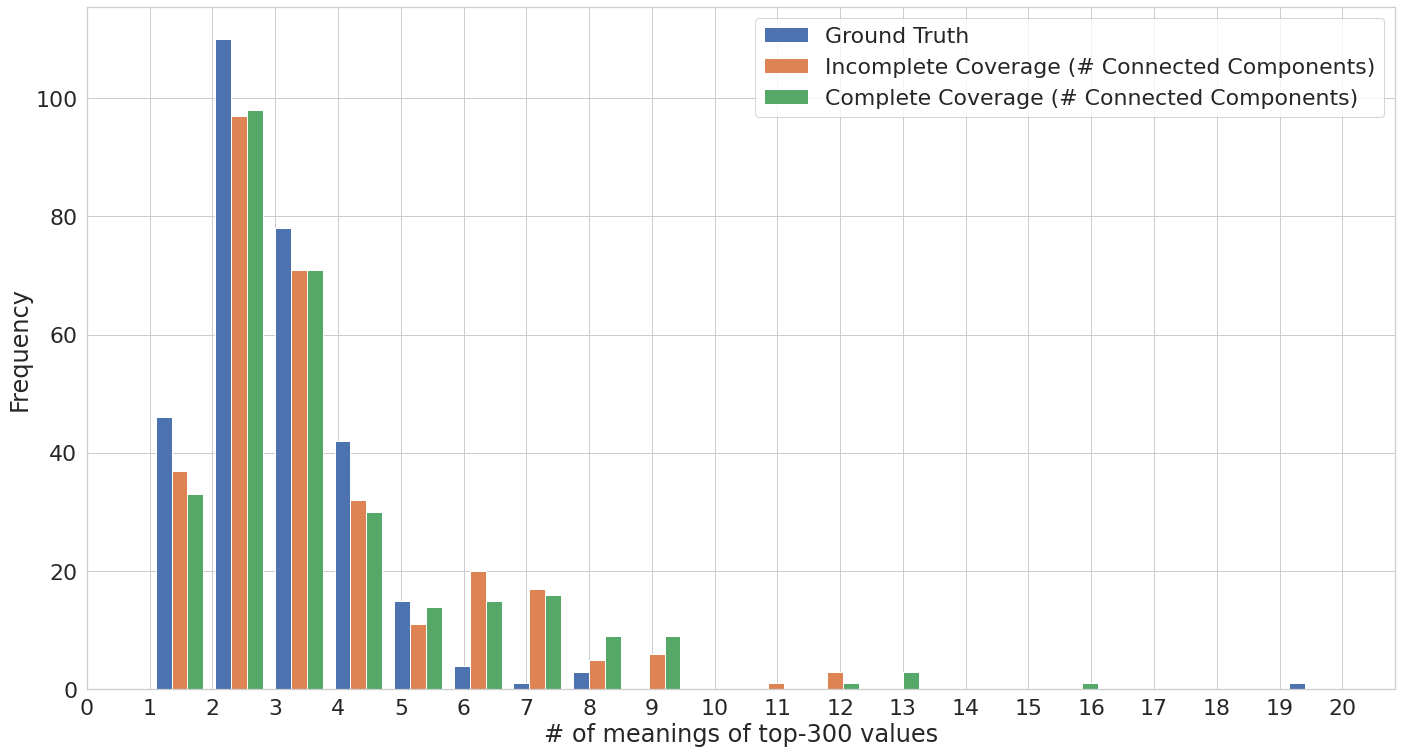

In [43]:
ax = plt.hist([df_300['num_meanings_groundtruth'], df_incomplete_300['num_connected_components'], df_complete_300['num_connected_components']], bins=20, label=['Ground Truth', 'Incomplete Coverage (# Connected Components)', 'Complete Coverage (# Connected Components)'])
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('# of meanings of top-300 values');plt.ylabel('Frequency');plt.legend();plt.tight_layout()
plt.savefig('../../figures/num_meanings/TUS/num_meanings_top_300_connected_components_histogram.svg')

In [52]:
df_incomplete_300.sort_values(by='num_meanings_groundtruth',  ascending=False).head(20)

,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
191365,,cell,0.010669,0.000134,True,False,12.0,20,6.0,357.0,0.952381,6.0,2142.0,21.899160,False,False
10223,50,cell,0.022695,0.000293,True,False,4.0,8,4.0,4887.0,0.986904,3.0,73.0,4.994066,False,False
10392,3,cell,0.006305,0.000076,True,False,19.0,8,4.0,8730.0,0.999771,4.0,79.0,4.823826,False,False
17681,2,cell,0.018183,0.000220,True,False,8.0,8,5.0,10736.0,0.994877,4.0,79.0,4.992269,False,False
10215,100,cell,0.002128,0.000026,True,False,41.0,7,4.0,8730.0,0.993127,3.0,75.0,4.875029,False,False
27559,Queensway,cell,0.000620,0.000007,True,False,117.0,6,4.0,8266.0,0.863295,3.0,128.0,22.386644,False,False
30496,Broadway,cell,0.001577,0.000019,True,False,55.0,6,6.0,8580.0,0.879254,5.0,216.0,24.500699,True,False
27813,Park Road,cell,0.002379,0.000029,True,False,36.0,6,6.0,15735.0,0.915412,5.0,215.0,21.846648,True,False
26497,Kingsway,cell,0.000485,0.000006,True,False,138.0,6,4.0,9925.0,0.863879,3.0,158.0,23.068615,False,False
25179,Nelson St,cell,0.000438,0.000005,True,False,153.0,5,4.0,9231.0,0.874878,3.0,101.0,23.296826,False,False


In [54]:
utils.graph_helpers.get_cell_node_column_names(G, 'Common')

['MOTTLE_FRQ', 'ShortCommonName', 'Indicator', 'ROOT_FREQ', 'CommonName']

In [55]:
df_incomplete_300[df_incomplete_300['is_homograph']==False]

,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth,num_meanings,num_marked_unambiguous_vals,marked_unambiguous_values_precision,num_connected_components,marked_hom_degree,marked_uv_avg_degree,is_num_meanings_correct,is_num_components_correct
154194,No summary - Aucun sommaire,cell,0.001103,0.000015,False,False,75.0,1,1.0,1648.0,1.0,1.0,100.0,20.000000,True,True
164402,UFA Nomination,cell,0.000982,0.000012,False,False,83.0,1,4.0,23617.0,1.0,4.0,100.0,20.008468,False,False
166782,Yeendoo nanh nakhweenjit k' art' ahanahtyaa - ...,cell,0.000982,0.000012,False,False,83.0,1,4.0,23617.0,1.0,4.0,100.0,20.008468,False,False
163961,No title - Aucun titre,cell,0.000982,0.000012,False,False,83.0,1,4.0,23617.0,1.0,4.0,100.0,20.008468,False,False
164831,Arctic freshwater systems: hydrology and ecology,cell,0.000982,0.000012,False,False,83.0,1,4.0,23617.0,1.0,4.0,100.0,20.008468,False,False
166510,Student - Research,cell,0.000982,0.000012,False,False,83.0,1,4.0,23617.0,1.0,4.0,100.0,20.008468,False,False
166799,Technologies and Strategies for Assessment of ...,cell,0.000982,0.000012,False,False,83.0,1,4.0,23617.0,1.0,4.0,100.0,20.008468,False,False
168730,Canada Research Chair in Cognitive Neuroscience,cell,0.000690,0.000008,False,False,110.0,1,3.0,18904.0,1.0,3.0,80.0,20.025391,False,False
169576,Preclinical development of payload and vehicle...,cell,0.000690,0.000008,False,False,110.0,1,3.0,18904.0,1.0,3.0,80.0,20.025391,False,False
169931,"Modeling, fabrication and characterization of ...",cell,0.000690,0.000008,False,False,110.0,1,3.0,18904.0,1.0,3.0,80.0,20.025391,False,False


# Test

In [55]:
df[df['is_homograph'] == False].head(50)

,node,node_type,betweenness_centrality,approximate_betweenness_centrality,is_homograph,has_missing_key,dense_rank,num_meanings_groundtruth
154194,No summary - Aucun sommaire,cell,0.001103,0.000015,False,False,75.0,NaN
164402,UFA Nomination,cell,0.000982,0.000012,False,False,83.0,NaN
166782,Yeendoo nanh nakhweenjit k' art' ahanahtyaa - ...,cell,0.000982,0.000012,False,False,83.0,NaN
163961,No title - Aucun titre,cell,0.000982,0.000012,False,False,83.0,NaN
164831,Arctic freshwater systems: hydrology and ecology,cell,0.000982,0.000012,False,False,83.0,NaN
166510,Student - Research,cell,0.000982,0.000012,False,False,83.0,NaN
166799,Technologies and Strategies for Assessment of ...,cell,0.000982,0.000012,False,False,83.0,NaN
168730,Canada Research Chair in Cognitive Neuroscience,cell,0.000690,0.000008,False,False,110.0,NaN
169576,Preclinical development of payload and vehicle...,cell,0.000690,0.000008,False,False,110.0,NaN
169931,"Modeling, fabrication and characterization of ...",cell,0.000690,0.000008,False,False,110.0,NaN


In [68]:
utils.graph_helpers.get_cell_node_column_names(G, 'Music Faculty')

['CommonName', 'Landmark', 'Department-D�partement']

In [67]:
utils.graph_helpers.get_cell_node_column_names(G, ' ')

['CONSIS_PLS',
 'ROOT_THICK',
 'CONSIS_DRY',
 'S_PRM_KIND',
 'MOTTLE_SZE',
 'S_PRM_MOD',
 'COLOUR_1',
 'SALINITY',
 'S_SEC_GRAD',
 'CONSIS_MST',
 'S_PRM_SIZE',
 'ROOT_ORIEN',
 'S_SEC_KIND',
 'S_SEC_SIZE',
 'S_PRM_GRAD',
 'CONSIS_WET',
 'ROOT_FREQ',
 'MOTTLE_FRQ',
 'EFFERVESC',
 'COLOUR_2']